In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('car data.csv')

In [53]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
# convert categorical variables to numerical
df['Year'] = df['Year'].astype('category').cat.codes
df['Transmission'] = df['Transmission'].astype('category').cat.codes
df['Fuel_Type'] = df['Fuel_Type'].astype('category').cat.codes
df['Selling_type'] = df['Selling_type'].astype('category').cat.codes
df['Car_Name'] = df['Car_Name'].astype('category').cat.codes

In [56]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,11,3.35,5.59,27000,2,0,1,0
1,93,10,4.75,9.54,43000,1,0,1,0
2,68,14,7.25,9.85,6900,2,0,1,0
3,96,8,2.85,4.15,5200,2,0,1,0
4,92,11,4.60,6.87,42450,1,0,1,0


In [57]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model_V1 = GradientBoostingRegressor()
model_V1.fit(train_X, train_y)

GradientBoostingRegressor()

In [59]:
pred = model_V1.predict(test_X)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.7280238609402915
R^2 Score: 0.9683956853667407


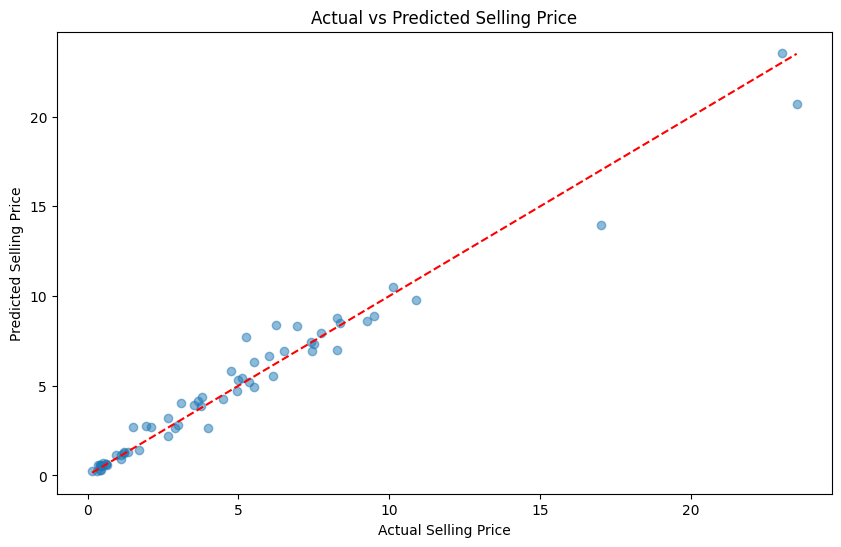

In [60]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(test_y, pred, alpha=0.5)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

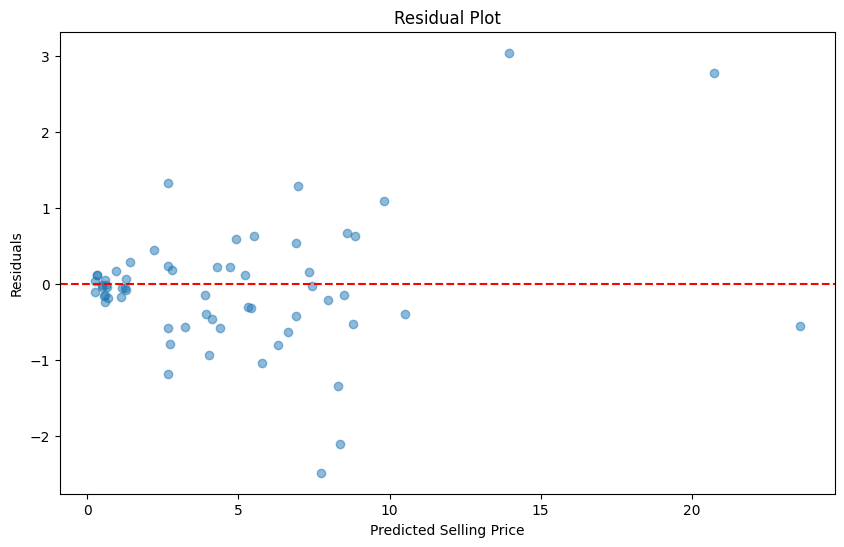

In [61]:
# plot residuals (difference between actual and predicted values)
residuals = test_y - pred

plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

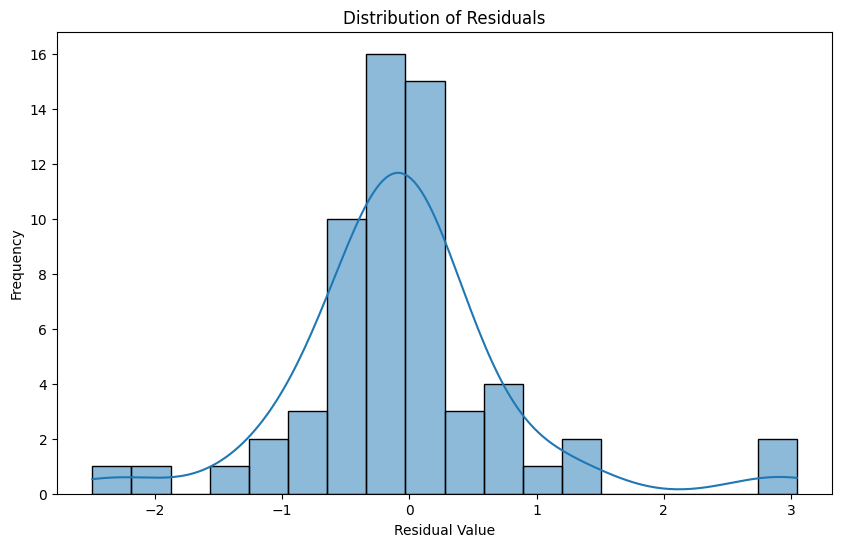

In [62]:
# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
model_V2 = LinearRegression()
model_V2.fit(train_X, train_y)

LinearRegression()

In [64]:
pred = model_V2.predict(test_X)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.5370204237414185
R^2 Score: 0.8464540623822272


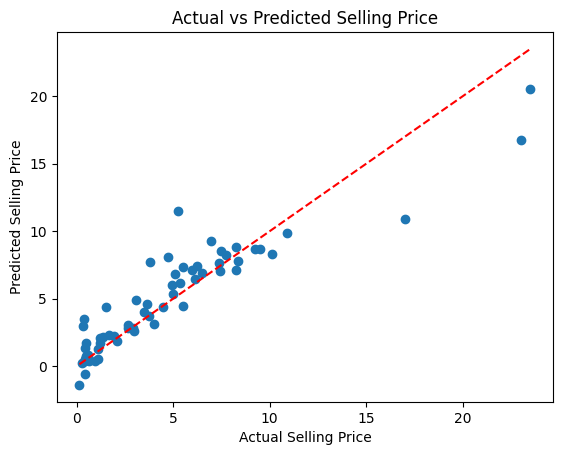

In [65]:
plt.scatter(test_y, pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')  # reference line
plt.show()


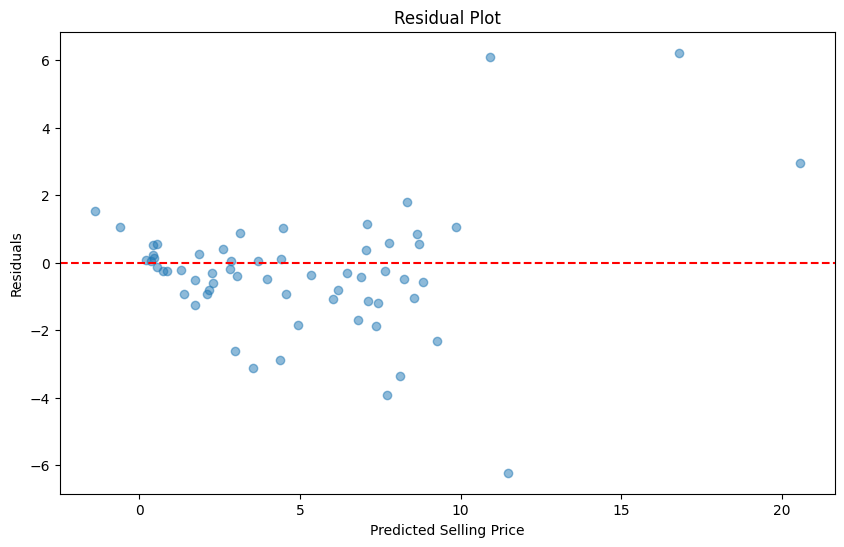

In [66]:
# plot residuals (difference between actual and predicted values)
residuals = test_y - pred

plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

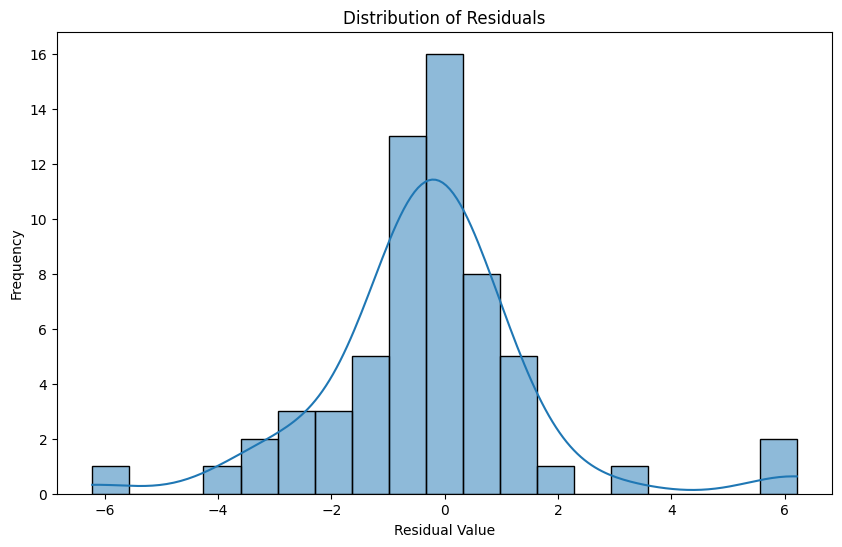

In [67]:
# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()